# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [78]:
df = pd.read_csv('data/Advertising.csv')
df

,Unnamed: 0,TV,radio,newpaper,sales
0,0,230.1,37.8,6s9.2,22100.0
1,1,44.5,39.3,45.1,10400.0
2,2,17.2,45.9,69.3,9300.0
3,3,151.5,41.3,58.5,18500.0
4,4,180.8,10.8,58.4,12900.0
...,...,...,...,...,...
195,195,38.2,3.7,13.8,7600.0
196,196,94.2,4.9,8.1,9700.0
197,197,177.0,9.3,6.4,12800.0
198,198,283.6,42.0,66.2,25500.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newpaper    200 non-null    object 
 4   sales       200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


No null values.

In [80]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [81]:
df.dtypes

TV          float64
radio       float64
newpaper     object
sales       float64
dtype: object

Limpio newspaper:

In [82]:
df['newpaper'].unique()

array(['6s9.2', '45.1', '69.3', '58.5', '58.4', '75.0', '23.5', '11.6',
       '1.0', '21.2', '24.2', '4.0', '65.9', '7.2', '46.0', '52.9',
       '114.0', '55.8', '18.3', '19.1', '53.4', '49.6', '26.2', '19.5',
       '12.6', '22.9', '40.8', '43.2', '38.6', '30.0', '0.3', '7.4',
       '8.5', '5.0', '45.7', '35.1', '32.0', '31.6', '38.7', '1.8',
       '26.4', '43.3', '31.5', '35.7', '18.5', '49.9', '36.8', '34.6',
       '3.6', '39.6', '58.7', '15.9', '60.0', '41.4', '16.6', '37.7',
       '9.3', '21.4', '54.7', '27.3', '8.4', '28.9', '0.9', '2.2', '10.2',
       '11.0', '27.2', '31.7', '19.3', '31.3', '13.1', '89.4', '20.7',
       '14.2', '9.4', '23.1', '22.3', '36.9', '32.5', '35.6', '33.8',
       '65.7', '16.0', '63.2', '73.4', '51.4', '33.0', '59.0', '72.3',
       '10.9', '5.9', '22.0', '51.2', '45.9', '49.8', '100.9', '17.9',
       '5.3', '29.7', '23.2', '25.6', '5.5', '56.5', '2.4', '10.7',
       '34.5', '52.7', '14.8', '79.2', '46.2', '50.4', '15.6', '12.4',
       '74.2'

In [83]:
df.loc[0, 'newpaper'] = '69.2'
df

,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [84]:
df.rename(columns={'newpaper': 'newspaper'}, inplace=True)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [85]:
df['newspaper'] = df['newspaper'].astype(float)

In [86]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

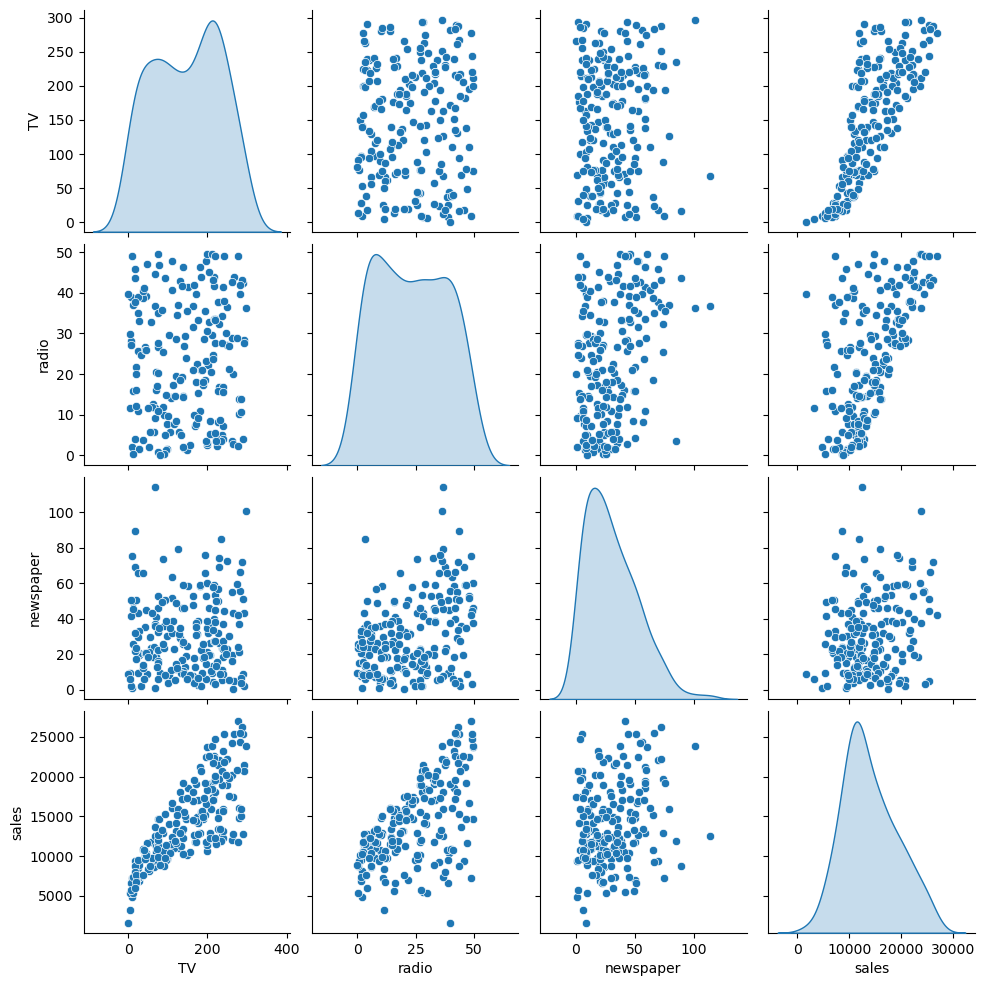

In [87]:
sns.pairplot(df, diag_kind='kde')

Parece haber linealidad entre 'Sales' y las 3 formas de marketing (TV, radio, newspaper). Entre estas formas de marketing no existe esa misma linealidad.

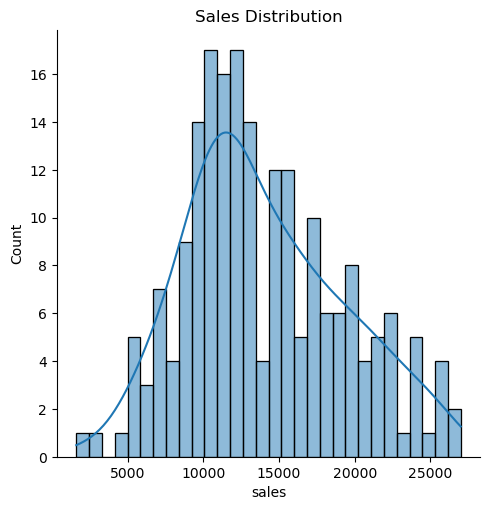

In [88]:
sns.displot(df['sales'], kde=True, bins=30)
plt.title('Sales Distribution');

Target muestra una distribución bastante normal.

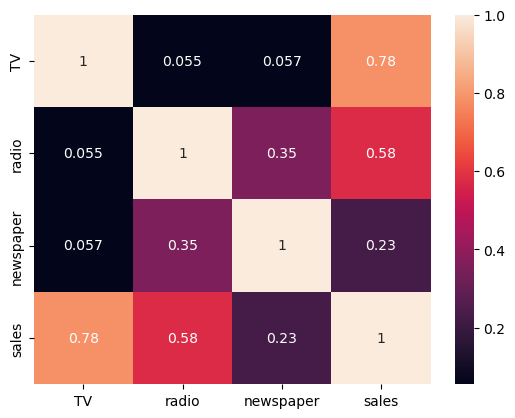

In [89]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

TV es la forma de marketing más correlacionada con sales, lo que puede indicar que vaya a tener más influencia en las ventas que el resto, seguido de radio y newspaper.

No hay una colinealidad considerable entre estas formas de marketing, quizás sí cierto grado entre newspaper y radio.

## Modelado

In [90]:
X = df.drop('sales',axis=1)
y = df['sales']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Primero evalúo un modelo de Linear Regression simple, sin regresión:

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
linear_model = LinearRegression()

Escalo, pues el Linear Regression no se ve afectado por ello pero la regularización sí, así que hago en todas las pruebas lo mismo:

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [96]:
R2_SCORE = []
MAE = []
MSE = []
RMSE = []

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

test_predictions = linear_model.predict(X_test)

LINEAR_R2_SCORE = r2_score(y_test, test_predictions)
LINEAR_MAE = mean_absolute_error(y_test, test_predictions)
LINEAR_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
LINEAR_MSE = mean_squared_error(y_test, test_predictions)
LINEAR_RMSE = np.sqrt(LINEAR_MSE)

R2_SCORE.append(LINEAR_R2_SCORE)
MAE.append(LINEAR_MAE)
MSE.append(LINEAR_MSE)
RMSE.append(LINEAR_RMSE)

print(f"R2: {LINEAR_R2_SCORE}")
print(f"MAE: {LINEAR_MAE}")
print(f"MAPE: {LINEAR_MAPE}")
print(f"MSE: {LINEAR_MSE}")
print(f"RMSE: {LINEAR_RMSE}")
print(f"\nMedia de la altura de los alumnos: {y.mean()}")

R2: 0.9185780903322445
MAE: 1213.7457736144815
MAPE: 0.11831359130546636
MSE: 2298716.697886379
RMSE: 1516.1519375993882

Media de la altura de los alumnos: 14022.5


In [98]:
baseline_error = LINEAR_MSE

### Compruebo si un polynomial regression puede ser beneficioso:

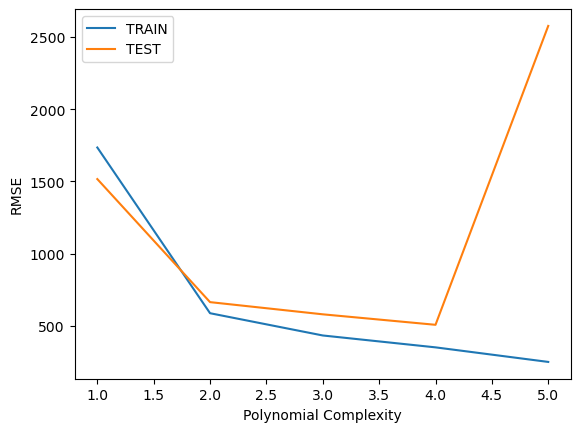

In [99]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

    # Append errors to lists for plotting later    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN')

plt.plot(range(1,6), test_rmse_errors[:5], label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

Parece que con un grado 4 obtenemos el menor error, pero de 2 a 4 el cambio no es muy relevante como para la complejidad computacional que supone, por lo que opto por grado 2.

In [100]:
polynomial_converter = PolynomialFeatures(degree=2)

In [101]:
poly_features = polynomial_converter.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
polynomial_model = LinearRegression()

In [105]:
polynomial_model.fit(X_train, y_train)

LinearRegression()

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

test_predictions = polynomial_model.predict(X_test)

LINEAR_R2_SCORE = r2_score(y_test, test_predictions)
LINEAR_MAE = mean_absolute_error(y_test, test_predictions)
LINEAR_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
LINEAR_MSE = mean_squared_error(y_test, test_predictions)
LINEAR_RMSE = np.sqrt(LINEAR_MSE)

R2_SCORE.append(LINEAR_R2_SCORE)
MAE.append(LINEAR_MAE)
MSE.append(LINEAR_MSE)
RMSE.append(LINEAR_RMSE)

print(f"R2: {LINEAR_R2_SCORE}")
print(f"MAE: {LINEAR_MAE}")
print(f"MAPE: {LINEAR_MAPE}")
print(f"MSE: {LINEAR_MSE}")
print(f"RMSE: {LINEAR_RMSE}")
print(f"\nMedia de la altura de los alumnos: {y.mean()}")

R2: 0.9843529333146797
MAE: 489.6798044803563
MAPE: 0.05375511765333121
MSE: 441750.55104033835
RMSE: 664.6431757268996

Media de la altura de los alumnos: 14022.5


### A continuación, Ridge:

In [107]:
from sklearn.linear_model import RidgeCV

In [108]:
ridge_model = RidgeCV(alphas=(0.005, 0.05, 0.1, 1.0, 10.0), cv=2, scoring='neg_mean_absolute_error')

In [109]:
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=(0.005, 0.05, 0.1, 1.0, 10.0), cv=2,
        scoring='neg_mean_absolute_error')

In [110]:
ridge_model.alpha_

0.1

In [111]:
test_predictions = ridge_model.predict(X_test)
test_predictions

array([13943.92480495, 19343.73020151, 12303.93295909, 16741.83949939,
        7934.4815613 ,  6977.59909421, 20150.32090021, 17492.37928116,
       10542.34378088, 20120.6028894 ,  9477.41723186, 14077.70094544,
       12046.78900312, 23367.11669369, 19648.92028442,  9177.61048815,
       12134.40731468,  9263.39661028,  8457.67015572, 21652.8858537 ,
        7089.72072872, 19338.91402944, 27286.92753945, 24597.9758118 ,
        9029.78309646, 11798.07426985, 20460.75829999,  9195.77605366,
       12727.33021853,  8662.92377701,  8681.05025296, 20194.50268058,
       10912.44449122,  6878.80808699, 18261.90532209,  9459.91475854,
       10334.57451958,  9650.60060266,  7474.7034023 , 11009.04331806,
       12604.64472755, 10631.17210716, 11198.09209549,  7491.57139843,
       11384.56497506, 10277.87810471,  6213.38980534, 15509.89187535,
       13342.35432709, 22695.67267687, 10419.36933293, 13206.35682267,
       14269.12764595, 11855.02640533, 11669.52447825,  5670.73538768,
      

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

test_predictions = ridge_model.predict(X_test)

RIDGE_R2_SCORE = r2_score(y_test, test_predictions)
RIDGE_MAE = mean_absolute_error(y_test, test_predictions)
RIDGE_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
RIDGE_MSE = mean_squared_error(y_test, test_predictions)
RIDGE_RMSE = np.sqrt(RIDGE_MSE)

R2_SCORE.append(RIDGE_R2_SCORE)
MAE.append(RIDGE_MAE)
MSE.append(RIDGE_MSE)
RMSE.append(RIDGE_RMSE)

print(f"R2: {RIDGE_R2_SCORE}")
print(f"MAE: {RIDGE_MAE}")
print(f"MAPE: {RIDGE_MAPE}")
print(f"MSE: {RIDGE_MSE}")
print(f"RMSE: {RIDGE_RMSE}")
print(f"\nMedia de la altura de los alumnos: {y.mean()}")

R2: 0.9844750909702518
MAE: 486.2264366703678
MAPE: 0.053937731299195504
MSE: 438301.77608794224
RMSE: 662.0436360905089

Media de la altura de los alumnos: 14022.5


### Lasso:

In [113]:
from sklearn.linear_model import LassoCV, Lasso

In [114]:
lasso_model = LassoCV(eps=0.005, n_alphas=100, cv=2, max_iter=10000, random_state=101)

In [115]:
lasso_model.fit(X_train, y_train)

LassoCV(cv=2, eps=0.005, max_iter=10000, random_state=101)

In [116]:
lasso_model.alpha_

24.715354546129173

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

test_predictions = lasso_model.predict(X_test)

LASSO_R2_SCORE = r2_score(y_test, test_predictions)
LASSO_MAE = mean_absolute_error(y_test, test_predictions)
LASSO_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
LASSO_MSE = mean_squared_error(y_test, test_predictions)
LASSO_RMSE = np.sqrt(LASSO_MSE)

R2_SCORE.append(LASSO_R2_SCORE)
MAE.append(LASSO_MAE)
MSE.append(LASSO_MSE)
RMSE.append(LASSO_RMSE)

print(f"R2: {LASSO_R2_SCORE}")
print(f"MAE: {LASSO_MAE}")
print(f"MAPE: {LASSO_MAPE}")
print(f"MSE: {LASSO_MSE}")
print(f"RMSE: {LASSO_RMSE}")
print(f"\nMedia de la altura de los alumnos: {y.mean()}")

R2: 0.9838756509969058
MAE: 468.0063016412154
MAPE: 0.056443865477891896
MSE: 455225.26365699957
RMSE: 674.7038340316435

Media de la altura de los alumnos: 14022.5


#### Lasso graphs:

In [118]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_lasso = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Lasso(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_lasso.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    lasso_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(lasso_error)
    baseline.append(baseline_error)

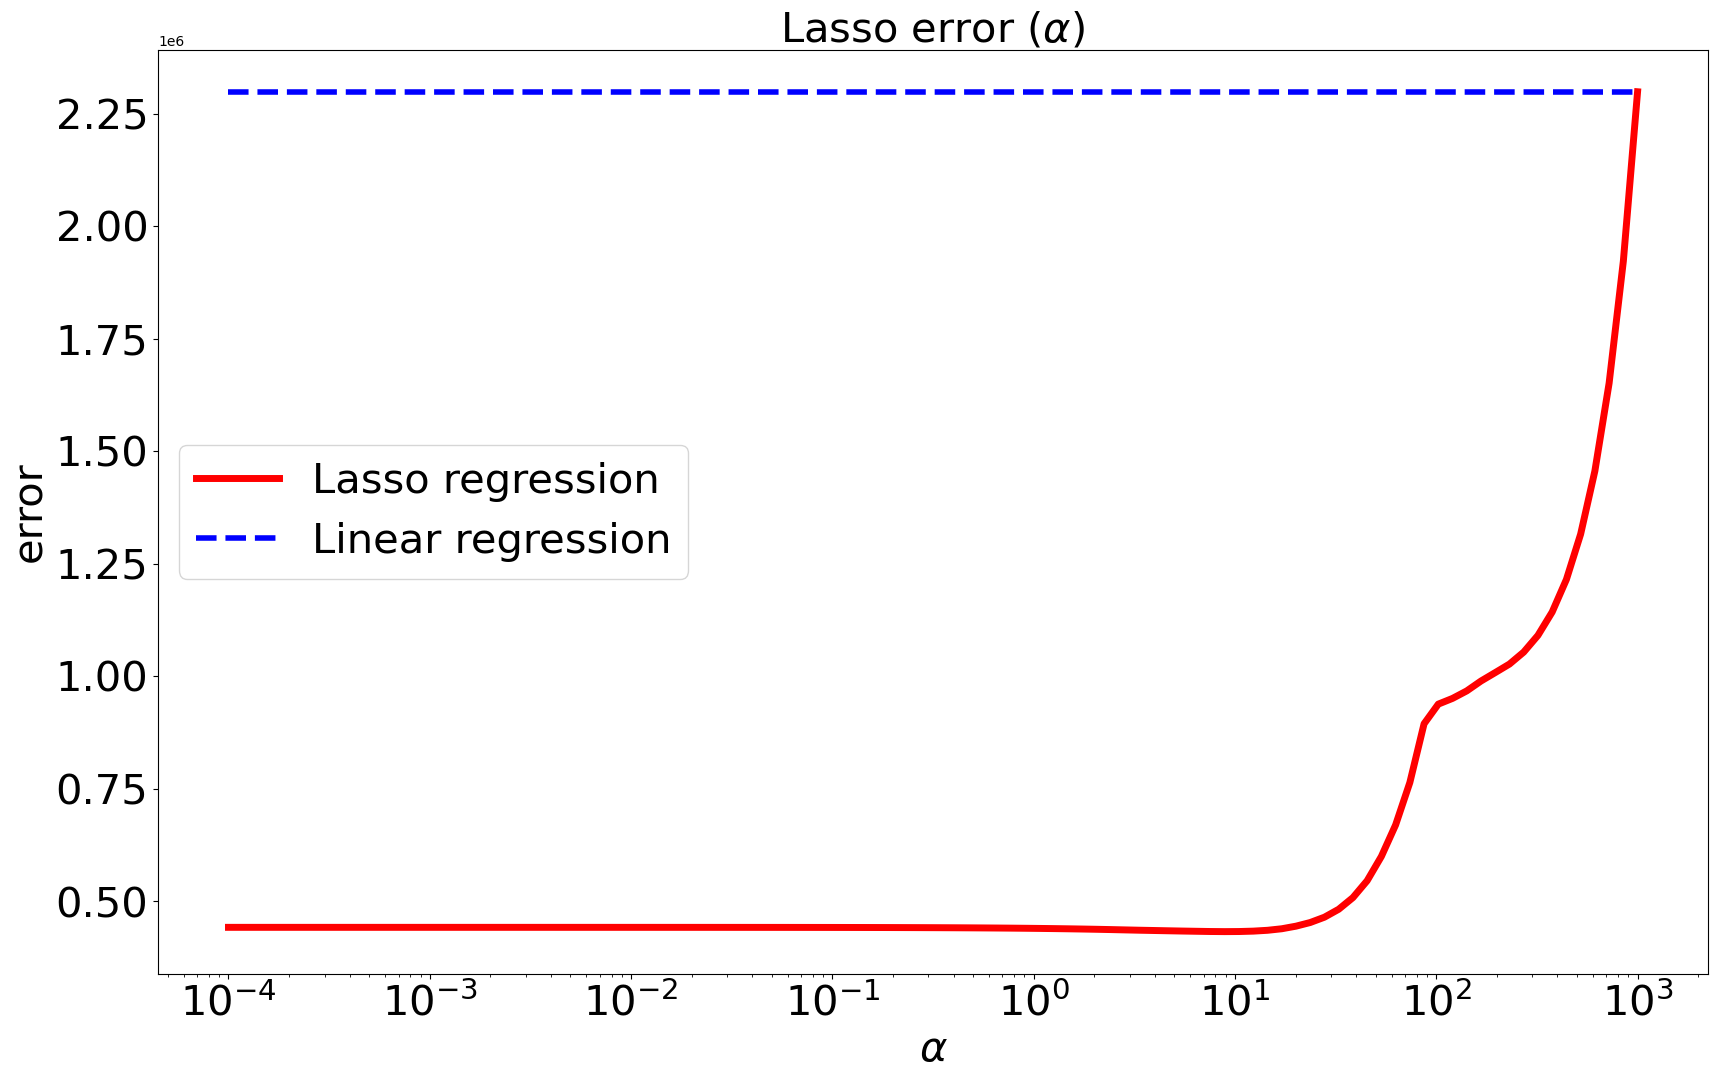

In [119]:
plt.figure(figsize=(20, 12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Lasso regression")
ax.plot(alphas, baseline, linewidth=4, linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel(r'$\alpha$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Lasso error ($\alpha$)', fontsize=30)
plt.show()

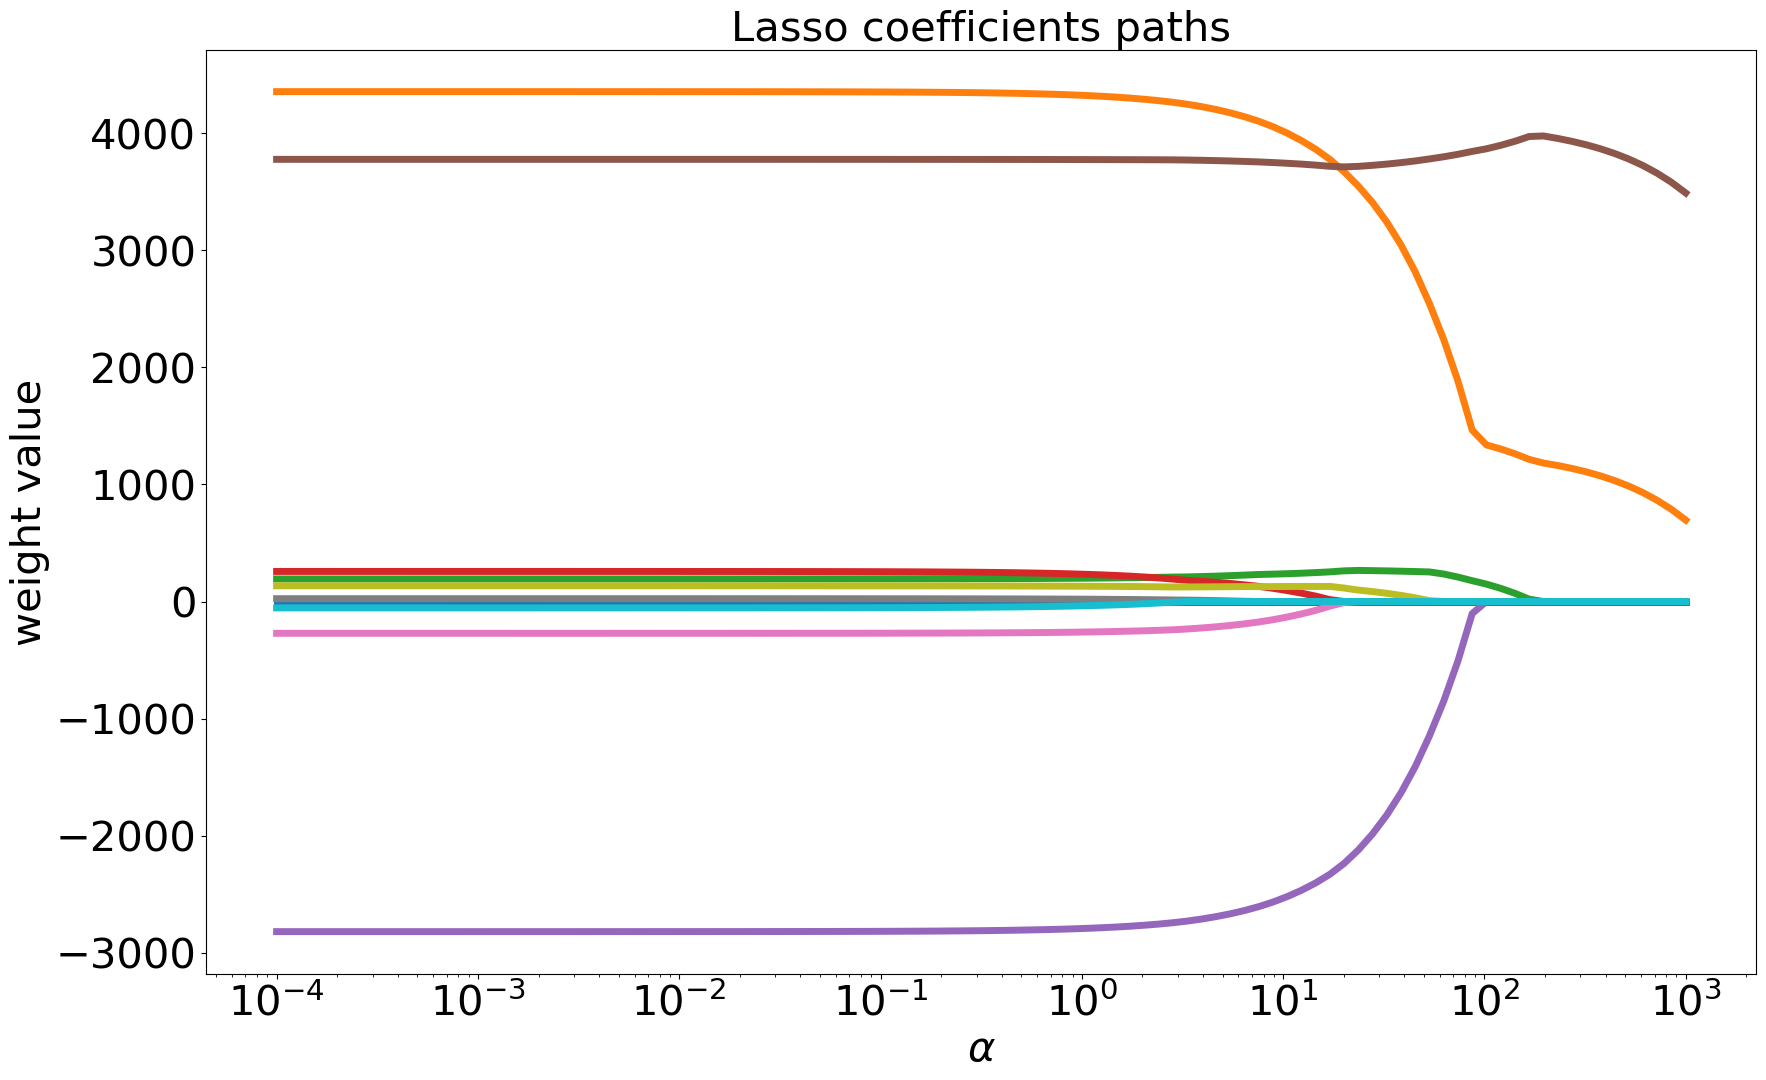

In [120]:
plt.figure(figsize=(20, 12))
ax = plt.gca()
ax.plot(alphas, coef_lasso, linewidth=5)
ax.set_xscale('log')
plt.xlabel(r'$\alpha$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title('Lasso coefficients paths', fontsize=30)
plt.show()

### Elastic-Net:

In [121]:
from sklearn.linear_model import ElasticNetCV

In [122]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=0.00005, n_alphas=100, max_iter=100000, cv=2)

In [123]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=2, eps=5e-05, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000)

In [124]:
elastic_model.l1_ratio_

1.0

In [125]:
elastic_model.alpha_

4.969460784470576

Obtenemos un l1_ratio óptimo de 1, por lo que opta directamente por Lasso Regression con alpha = 9331637.903102046

In [126]:
test_predictions = elastic_model.predict(X_test)
test_predictions

array([13894.49824248, 19356.15654919, 12270.40207809, 16686.07201753,
        8032.36933896,  7012.90539652, 20148.8707865 , 17486.93034643,
       10551.33953841, 20092.76643407,  9527.23810466, 14099.79017184,
       12042.69614667, 23332.47777117, 19657.18988224,  9200.90892995,
       12133.97047574,  9293.51360027,  8483.44130511, 21624.39302555,
        7141.63699285, 19295.34315673, 27272.32623191, 24597.35920276,
        9101.99361471, 11770.69203325, 20489.04120497,  9169.48043206,
       12715.55463968,  8627.51663947,  8651.01730637, 20168.8831182 ,
       10923.61608671,  6864.38546377, 18223.379459  ,  9436.35892836,
       10324.60355024,  9680.96857217,  7461.22803338, 11016.32609829,
       12677.39840258, 10605.29676654, 11166.96593723,  7473.71897626,
       11386.21846355, 10294.14907411,  6303.90823107, 15500.00337586,
       13322.37086554, 22653.43603229, 10389.16125897, 13185.57665993,
       14275.84866986, 11886.1079383 , 11651.29744346,  5776.37139502,
      

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

test_predictions = elastic_model.predict(X_test)

ELASTIC_R2_SCORE = r2_score(y_test, test_predictions)
ELASTIC_MAE = mean_absolute_error(y_test, test_predictions)
ELASTIC_ELASTIC_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
ELASTIC_MSE = mean_squared_error(y_test, test_predictions)
ELASTIC_RMSE = np.sqrt(ELASTIC_MSE)

R2_SCORE.append(ELASTIC_R2_SCORE)
MAE.append(ELASTIC_MAE)
MSE.append(ELASTIC_MSE)
RMSE.append(ELASTIC_RMSE)

print(f"R2: {ELASTIC_R2_SCORE}")
print(f"MAE: {ELASTIC_MAE}")
print(f"MAPE: {ELASTIC_ELASTIC_MAPE}")
print(f"MSE: {ELASTIC_MSE}")
print(f"RMSE: {ELASTIC_RMSE}")
print(f"\nMedia de la altura de los alumnos: {y.mean()}")

R2: 0.9846326228880955
MAE: 478.7580595367522
MAPE: 0.053889763085502404
MSE: 433854.30916564655
RMSE: 658.6761792911951

Media de la altura de los alumnos: 14022.5


### Elastic-Net Grid Search:

In [128]:
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': [0.005, 0.05, 0.1, 1, 5, 10, 50, 100], 'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}

from sklearn.model_selection import GridSearchCV

model = ElasticNet(max_iter=100000)

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2)

In [129]:
grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 56 candidates, totalling 112 fits
[CV] END ..........................alpha=0.005, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.005, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.005, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.005, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.005, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.005, 

GridSearchCV(cv=2, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.005, 0.05, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [130]:
print(f"Best estimator: {grid_model.best_estimator_}")
print(f"Best params: {grid_model.best_params_}")

Best estimator: ElasticNet(alpha=5, l1_ratio=1, max_iter=100000)
Best params: {'alpha': 5, 'l1_ratio': 1}


In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

test_predictions = grid_model.predict(X_test)

ELASTIC_R2_SCORE = r2_score(y_test, test_predictions)
ELASTIC_MAE = mean_absolute_error(y_test, test_predictions)
ELASTIC_ELASTIC_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
ELASTIC_MSE = mean_squared_error(y_test, test_predictions)
ELASTIC_RMSE = np.sqrt(ELASTIC_MSE)

R2_SCORE.append(ELASTIC_R2_SCORE)
MAE.append(ELASTIC_MAE)
MSE.append(ELASTIC_MSE)
RMSE.append(ELASTIC_RMSE)

print(f"R2: {ELASTIC_R2_SCORE}")
print(f"MAE: {ELASTIC_MAE}")
print(f"MAPE: {ELASTIC_ELASTIC_MAPE}")
print(f"MSE: {ELASTIC_MSE}")
print(f"RMSE: {ELASTIC_RMSE}")
print(f"\nMedia de la altura de los alumnos: {y.mean()}")

R2: 0.98463342599757
MAE: 478.7191866063564
MAPE: 0.05389196743610252
MSE: 433831.63564734283
RMSE: 658.6589676360163

Media de la altura de los alumnos: 14022.5


## Resultados

In [132]:
pd.DataFrame(
    {
        'Model': ['Linear', 'Polynomic Degree 2', 'Ridge', 'Lasso', 'ElasticNet', 'ElasticNet GridSearch'],
        'R2': R2_SCORE,
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
    }
).set_index('Model').sort_values('MSE', ascending=True)

,R2,MAE,MSE,RMSE
Model,,,,
ElasticNet GridSearch,0.984633,478.719187,4.338316e+05,658.658968
ElasticNet,0.984633,478.758060,4.338543e+05,658.676179
Ridge,0.984475,486.226437,4.383018e+05,662.043636
Polynomic Degree 2,0.984353,489.679804,4.417506e+05,664.643176
Lasso,0.983876,468.006302,4.552253e+05,674.703834
Linear,0.918578,1213.745774,2.298717e+06,1516.151938


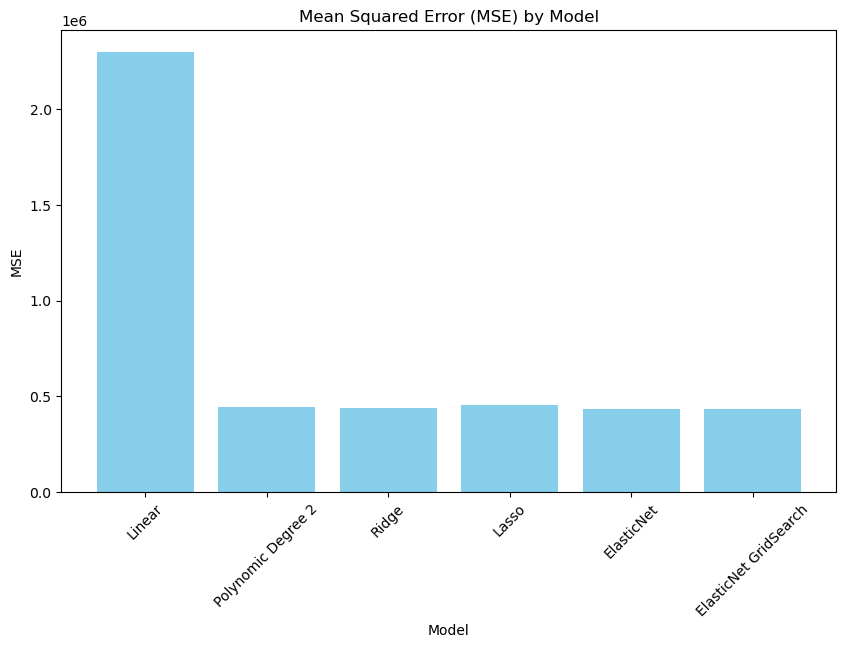

In [133]:
plt.figure(figsize=(10, 6))
models = ['Linear', 'Polynomic Degree 2', 'Ridge', 'Lasso', 'ElasticNet', 'ElasticNet GridSearch']
plt.bar(models, MSE, color='skyblue')
plt.title('Mean Squared Error (MSE) by Model')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

A partir de los errores obtenidos, se determina que la regularización Elastic-Net mejora ligeramente los resultados con respecto al polinómico de grado 2.

# (Explicación contaminación entre train y test)